In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Import data from csv into dataframes

In [3]:
# Reading a csv file and creating a data frame.

data = pd.read_csv("data0911.csv")
df = pd.DataFrame(data)    
df.head()             # Showing first 5 records in the DataFrame

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Informaton about data set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266543 entries, 0 to 266542
Data columns (total 9 columns):
lat          266543 non-null float64
lng          266543 non-null float64
desc         266543 non-null object
zip          234049 non-null float64
title        266543 non-null object
timeStamp    266543 non-null object
twp          266448 non-null object
addr         266543 non-null object
e            266543 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 18.3+ MB


Question 1: What are the top 10 Zipcodes for 911 & Question 1: Are Zipcodes 19446 and 19090 presents?

In [5]:
# What are the top 10 Zipcodes for 911 & Question 1: Are Zipcodes 19446 and 19090 presents?   - Done

topzip = df['zip'].value_counts().head(10)
print("Top 10 zip codes are : \n",topzip)

lst = [19446, 19090]        # Storing the given zip codes in the list
status = True               # Declaring a boolean variable

for item in lst:            # Running a loop through list items
    for z in topzip.index:  # Running a loop through the top 10 zip codes
        if(z == item):      # Condition to check if the item is present in the top 10 zip codes
            status= True
            break
        else:
            status = False
    if(status):               # Checking the boolean variable now and printing the values accordingly
        print("Zip ",item," is present in top 10.")
    else:
        print("Zip ",item," is not present in top 10.")
            


Top 10 zip codes are : 
 19401.0    18401
19464.0    17937
19403.0    13366
19446.0    12828
19406.0     8820
19002.0     8367
19468.0     7860
19046.0     7340
19454.0     7274
19090.0     6999
Name: zip, dtype: int64
Zip  19446  is present in top 10.
Zip  19090  is present in top 10.


Question 2: What are the top 4 townships (twp) for 911 calls & Question 2: Which of the following township are not present? --LOWER POTTSGROVE, NORRISTOWN, HORSHAM, ABINGTON

In [7]:
# Compute --What are the top 4 townships (twp) for 911 calls & 
#Question 2: Which of the following township are not present? --LOWER POTTSGROVE, NORRISTOWN, HORSHAM, ABINGTON   - Done


toptwp = df['twp'].value_counts().head(4)
print("Top 4 townships are : \n",toptwp)

lst = ['LOWER POTTSGROVE', 'NORRISTOWN', 'HORSHAM', 'ABINGTON']  # Storing the townships in the list
status = True               # It's a boolean variable

for twn in lst:            # Running a loop through list items
    for z in toptwp.index:  # Running a loop through the top 10 zip codes
        if(z == twn):      # Condition to check if the item is present in the top 10 zip codes
            status= True
            break
        else:
            status = False
            
    if(status):     
        pass
        #print("\nTownship - ",twn," - is present in top 4 townships.")
    else:
        print("\nSorry! Township - ",twn," - is not present in top 4 townships.")


Top 4 townships are : 
 LOWER MERION    22886
ABINGTON        16379
NORRISTOWN      15421
UPPER MERION    14015
Name: twp, dtype: int64

Sorry! Township -  LOWER POTTSGROVE  - is not present in top 4 townships.

Sorry! Township -  HORSHAM  - is not present in top 4 townships.


Question 3 : Compute --Create new features & Question 3: What is the most common Reason for a 911 call based on Reason Column? Which comes second

In [8]:
# Compute --Create new features & 
#Question 3: What is the most common Reason for a 911 call based on Reason Column? Which comes second  - Done

df['Reason'] = df['title'].apply(lambda val:val.split(':')[0])  # Adding a new Reason column in the data frame with the helpof Lambda
df['Reason'].value_counts().head(2)         # Showing top 2 Reasons


EMS        133234
Traffic     93400
Name: Reason, dtype: int64

Question 4 : Compute --Plot barchart using matplot for911 calls by Reason & Question 4: How can you plot the bars horizontally?

EMS        133234
Traffic     93400
Fire        39909
Name: Reason, dtype: int64


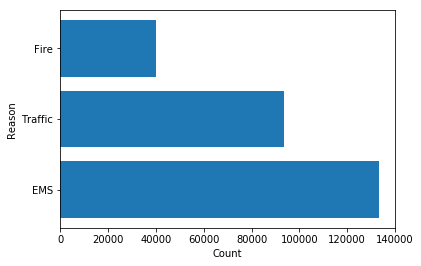

In [9]:
# Compute --Plot barchart using matplot for 911 calls by Reason & 
# Question 4: How can you plot the bars horizontally?    
df1 = df['Reason'].value_counts() 
print(df1)
plt.barh(df1.index,df1)      # barh is used to plot the bars horizontally.
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show();



Question 5 : Do data manipulation & Question 5: Which day got maximum calls for EMS and how many?

In [10]:
# Do data manipulation & Question 5: Which day got maximum calls for EMS and how many?  - Done

# first will convert the string column in datetime format
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Let's add a column with day of the week
df['DayofWeek']= df['timeStamp'].apply(lambda x:x.dayofweek)

week_day_dict={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'} 

df['DayofWeek']= df['DayofWeek'].map(week_day_dict)
df1 = df[df['Reason']=='EMS']                   # Manipulating the Dataframe to get the data only with reason EMS
df2 = df1['DayofWeek'].value_counts()           # Counting the Value for Day of the week
df2.head()[0:1]

Friday    19938
Name: DayofWeek, dtype: int64

Question 6 : Create a countplot of the Day of Week column with the hue based of the Reason column & Question 6: On which day traffic calls were lowest?

Lowest Traffic calles were on :  Sunday    8847
Name: DayofWeek, dtype: int64


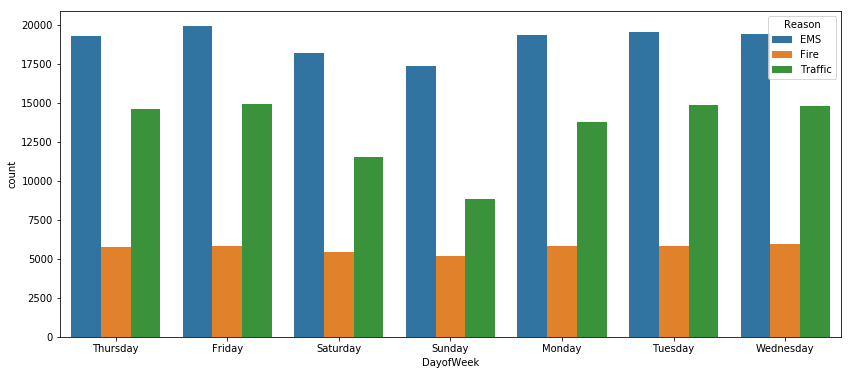

In [46]:
# Compute --Create a countplot of the Day of Week column with the hue based of the Reason column & 
# Question 6: On which day traffic calls were lowest?

# first will convert the string column in datetime format
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Let's add a column with day of the week
df['DayofWeek']= df['timeStamp'].apply(lambda x:x.dayofweek)

week_day_dict={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'} 

df['DayofWeek']= df['DayofWeek'].map(week_day_dict)

df1 = df[df['Reason']=='EMS']                   # Manipulating the Dataframe to get the data only with reason EMS
df2 = df1['DayofWeek'].value_counts() 

# Ploating the countplot for days of the week
plt.figure(figsize=(14,6))
sns.countplot(x='DayofWeek', data = df, hue='Reason');

# Here is the logic to find out the day which has lowest traffic calls
df3 = df[df['Reason']=='Traffic']
df4 = df3['DayofWeek'].value_counts()
df5 = df4.head(7)[::-1]
print("Lowest Traffic calles were on : ", df5.head(1))


Question 7: Compute --Create a countplot month wise --Question 7: Which month saw highest calls for fire?

Here is the month which saw the highest calls for fire :  June    3773
Name: Month, dtype: int64


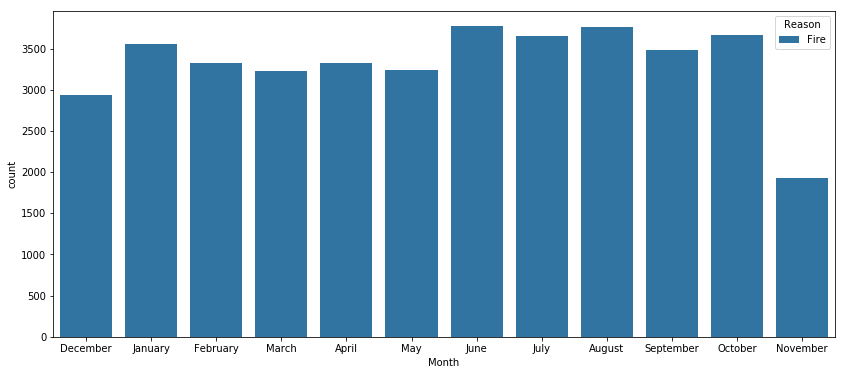

In [27]:
# Create a countplot month wise --
# Question 7: Which month saw highest calls for fire?

# first will convert the string column in datetime format
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Let's add a column with day of the week
df['Month']= df['timeStamp'].apply(lambda m:m.month)
#df.head()
month_dict={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'} 

df['Month']= df['Month'].map(month_dict)
df.head()
df1 = df[df['Reason']=='Fire']                   # Manipulating the Dataframe to get the data only with reason EMS
df2 = df1['Month'].value_counts() 

print("Here is the month which saw the highest calls for fire : ", df2.head(1))

# Ploting the countplot 
plt.figure(figsize=(14,6))
sns.countplot(x='Month', data = df1, hue='Reason');



Question 8 :  --Create Web Map for Traffic Calls & Question 8: Why some areas seem to have lower or almost zero traffic calls? Hint: Zoom the map

In [15]:
!pip install folium

In [21]:
# Compute --Create Web Map for Traffic Calls & 
#Question 8: Why some areas seem to have lower or almost zero traffic calls? Hint: Zoom the map

import folium 

df1 = df[df['Reason']=='Traffic']  # Manipulating the Dataframe with Traffic data

limit = 1000           # As Kernel is crashing for all the records, hence taking the limit as 1000

df1 = df1.iloc[0:limit, :]   # Updating the Dataframe with 1000 records

web_map = folium.Map(location=[39.95228,-75.16245], zoom_start=10)
web_map

incidents = folium.map.FeatureGroup()   # Creating an incident
labels=list(df1.Reason)

# Loop though the Traffic reason to fill the incident with the data
for lat1, lan1 in zip(df1.lat,df1.lng):
    incidents.add_child(folium.CircleMarker([lat1, lan1], radius =5, color='red', fill=True, fill_color='blue'))

web_map.add_child(incidents)


Thank you, this is the end of the Capstone Project with the answers of all the questions.